In [1]:
#plot greyscale histogram for all images:
import cv2
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt

#path for all greyscale images
path_to_grey_img = r"C:\Users\Mads Syge Monster PC\Desktop\pythonDUmp\greyscale"
path_to_grey_seg = r"C:\Users\Mads Syge Monster PC\Desktop\pythonDUmp\greyscale_out"

images = sorted(glob(os.path.join(path_to_grey_img, "IMG*.tiff")))
segs = sorted(glob(os.path.join(path_to_grey_seg, "I0*.tiff")))

#create histogram of image:

def Create_Hist(img_path):
  grey = cv2.imread(img_path, 0)
  temp_hist, _ = np.histogram(grey, bins=256, range=(0.0, 255.0))
  #print(np.count_nonzero(grey == 254))
  return(temp_hist)

In [3]:
#loop all images and add histogram
total_hist_img = np.zeros(256)
total_hist_seg = np.zeros(256)

for i in range(len(images)):
  #print("process img: ", i)
  temp_hist_img = Create_Hist(images[i])
  temp_hist_seg = Create_Hist(segs[i])
  total_hist_img += temp_hist_img
  total_hist_seg += temp_hist_seg



array([2.57142857e+00, 3.80952381e+00, 1.36190476e+01, 2.39285714e+01,
       4.14285714e+01, 6.15714286e+01, 8.44285714e+01, 1.17666667e+02,
       1.45642857e+02, 1.80880952e+02, 2.14119048e+02, 2.35952381e+02,
       2.47333333e+02, 1.71976190e+02, 2.24857143e+02, 2.60238095e+02,
       2.10809524e+02, 2.60142857e+02, 2.14285714e+02, 2.32000000e+02,
       2.39380952e+02, 2.17642857e+02, 2.40428571e+02, 2.51500000e+02,
       2.57333333e+02, 2.67523810e+02, 2.85261905e+02, 3.08547619e+02,
       3.39595238e+02, 3.71214286e+02, 4.22642857e+02, 4.91166667e+02,
       5.21380952e+02, 6.09095238e+02, 6.94833333e+02, 7.83309524e+02,
       8.99785714e+02, 1.04957143e+03, 7.72809524e+02, 1.34221429e+03,
       1.50078571e+03, 1.77842857e+03, 1.56673810e+03, 2.26907143e+03,
       2.57488095e+03, 2.92190476e+03, 3.26390476e+03, 3.63171429e+03,
       2.82916667e+03, 3.98480952e+03, 4.35757143e+03, 4.62742857e+03,
       4.88035714e+03, 4.83545238e+03, 5.14423810e+03, 4.49952381e+03,
      

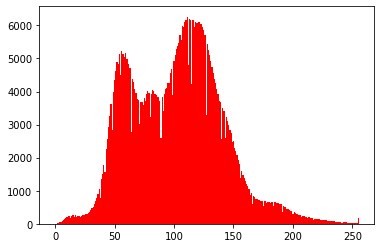

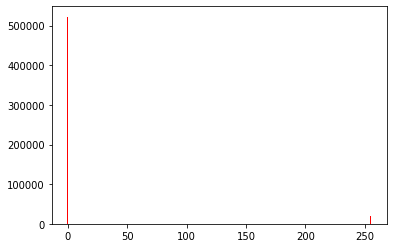

In [5]:
#bar plot of total histogram
const = 1/len(images)
totalHist_img = total_hist_img*const
totalHist_seg = total_hist_seg*const
width = 1.0


pos_img = np.arange(len(totalHist_img))
plt.bar(pos_img, totalHist_img, width, color='r')
plt.show()

pos_seg = np.arange(len(totalHist_seg))
plt.bar(pos_seg, totalHist_seg, width, color='r')
plt.show()


In [45]:
total = (total_hist_seg[0]+total_hist_seg[255])
print("total:",total_hist_seg[0],total_hist_seg[255])

print("avg:" ,totalHist_seg[0], totalHist_seg[255])

print("background %: ", (total_hist_seg[0]/total)*100)

print("artery %: ", (total_hist_seg[255]/total)*100)

print("Ratio of bg to artery: ", (total_hist_seg[0]/total)/(total_hist_seg[255]/total))


total: 21941202.0 810030.0
avg: 522409.5714285714 19286.42857142857
background %:  96.43962137962463
artery %:  3.5603786203753716
Ratio of bg to artery:  27.086900485167217


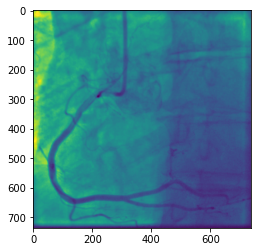

(736, 736)


error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


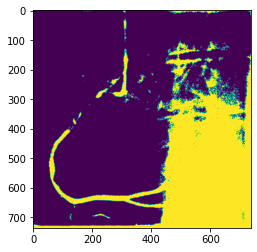

In [25]:
import cv2

import matplotlib.image as mpimg
img = mpimg.imread(images[40])
imgplot = plt.imshow(img)
plt.show()

grey = cv2.imread(images[40], 0)

print(grey.shape)
mask = grey<80


#print(mask)

#plt.imshow(grey)
plt.imshow(mask)

ret2, th2 = cv2.threshold(grey, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imshow(ret2)


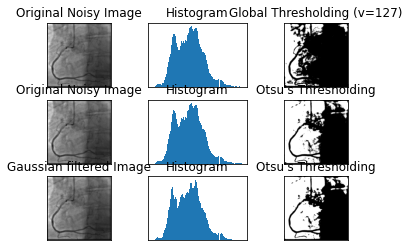

In [26]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


img = cv.imread(images[40], 0)
# global thresholding
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
# Otsu's thresholding
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)',
          'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
          'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3, 3, i*3+1), plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+2), plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+3), plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()
